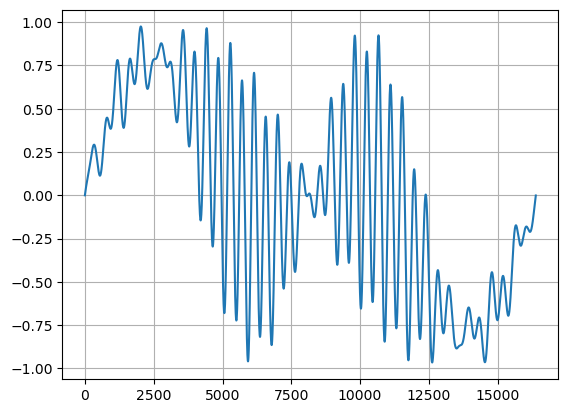

In [2]:
# Write a .csv file named L1_R2.csv with a FM stereo signal at baseband
# which can be used to modulate a carrier on your Siglent SDG1032X
#
# Frequencies in this stereo signal are:
# left = 1kHz
# right = 2kHz
#
# Seems to work on Siglent SDS2042X as well.
#
# The method using a csv file to transfer the waveform works well.
# Transferring a waveform using SCPI does not work well.
#
#
import matplotlib.pyplot as plt
import numpy as np
import csv

SAMPLES = 16384

# time axis
t = np.linspace(0,1,SAMPLES,endpoint=False)

f1 = 1
f2 = 2
f19 = 19
f38 = 38

s1 = np.sin(f1*2*np.pi*t)
s2 = np.sin(f2*2*np.pi*t)
s19 = np.sin(f19*2*np.pi*t)
s38 = np.sin(f38*2*np.pi*t)

# FM signal
ratio = .9
left = s1
right = s2
tone = s19
mono = (left + right) / 2
stereo = s38 * (left - right) / 2
signal = ratio * (mono + stereo) + (1 - ratio) * tone

with open('L1_R2.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['data length', f'{SAMPLES}'])
    writer.writerow(['frequency','1000'])
    writer.writerow(['amp','3'])
    writer.writerow(['offset','0'])
    writer.writerow(['phase','0'])
    writer.writerow(['',''])
    writer.writerow(['',''])
    writer.writerow(['',''])
    writer.writerow(['',''])
    writer.writerow(['',''])
    writer.writerow(['',''])
    writer.writerow(['',''])
    writer.writerow(['xpos','value'])
    
    for i in range(SAMPLES):
        writer.writerow([t[i],signal[i]])
        
plt.grid()
plt.plot(signal)